# **Assignment 2**
Note: CSV file must be uploaded everytime to run the code.

```
# This is formatted as code
```



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean_kaggle_data_2022.csv to clean_kaggle_data_2022 (1).csv


In [ ]:
df = pd.read_csv('clean_kaggle_data_2022.csv',encoding= 'latin_1')
df = df.drop(index=0)
df = df.drop('Duration (in seconds)',axis=1)
df.head()

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
1,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Other,NaN,"Online courses (Coursera, EdX, etc)",NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,Vim / Emacs,NaN,Jupyter Notebook,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deepnote Notebooks,NaN,NaN,NaN,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years,Scikit-learn,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huggingface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"Word embeddings/vectors (GLoVe, fastText, word...","Encoder-decoder models (seq2seq, vanilla trans...",NaN,"Transformer language models (GPT-3, BERT, XLne...",NaN,NaN,NaN,NaN,Huggingface Models,NaN,NaN,ONNX models,NaN,NaN,NaN,Other storage services (i.e. google drive),Huggingface Models,Data Scientist,Online Service/Internet-based Services,0-49 employees,2-Jan,"We recently started using ML methods (i.e., mo...",NaN,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN,NaN,NaN,"25,000-29,999","$1000-$9,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,ONNX Runtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weights & Biases,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,GPUs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-5 times,Twitter (data science influencers),NaN,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,..

## **1. [1 pt] Data cleaning:**

In [ ]:
df.shape

(8136, 297)

In [ ]:
df.isnull().sum(axis=0)

Q2                0
Q3                0
Q4                0
Q5                0
Q6_1           4374
               ... 
Q44_10         7370
Q44_11         7731
Q44_12         7820
Q29_Encoded       0
Q29_buckets       0
Length: 297, dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
cols_to_drop = percent_missing[percent_missing > 40].index.tolist()
cols_to_drop

['Q6_1',
 'Q6_2',
 'Q6_3',
 'Q6_4',
 'Q6_5',
 'Q6_6',
 'Q6_7',
 'Q6_8',
 'Q6_9',
 'Q6_10',
 'Q6_11',
 'Q6_12',
 'Q7_1',
 'Q7_3',
 'Q7_4',
 'Q7_5',
 'Q7_6',
 'Q7_7',
 'Q10_1',
 'Q10_2',
 'Q10_3',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q12_5',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_14',
 'Q12_15',
 'Q13_1',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q13_5',
 'Q13_6',
 'Q13_7',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_12',
 'Q13_13',
 'Q13_14',
 'Q14_1',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q14_5',
 'Q14_6',
 'Q14_7',
 'Q14_8',
 'Q14_9',
 'Q14_10',
 'Q14_11',
 'Q14_12',
 'Q14_13',
 'Q14_14',
 'Q14_15',
 'Q14_16',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q15_5',
 'Q15_6',
 'Q15_7',
 'Q15_8',
 'Q15_9',
 'Q15_10',
 'Q15_11',
 'Q15_12',
 'Q15_13',
 'Q15_14',
 'Q15_15',
 'Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_5',
 'Q17_6',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_14',
 'Q17_15',
 'Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q18_5',
 'Q18_

There's a significant number of missing/null values, present in every row almost. Thus, the option to remove rows or columns with null values cannot be pursued as we'd be essentially erasing the entire dataset. I am going to perform data cleaning on the features I find most important to make a proper model and based on skills needed for a successful data analyst or scientist. For the sake of convience, questions where its columns have more than 40% of their entries null are dropped, with the exception of question 12 that has to do with the knowledge of programming languages which I think is necessary. There are some columns that I will drop manually as well, such as questions 26 and 27 because they caused me problems while trying to clean them and I don't think they're especially significant either. The focus will be on questions 2, 3, 4, 5, 8, 9, 11, 12, 15, 16, 23, 24, 25, 29, and 30. For questions with the select all that apply type answer, the data will be transformed into a sum of how many options a person chooses. For example, in question 12 that asks 'What programming languages do you use on a regular basis?', and someone selects python, SQL, and MATLAB, they will have a score of 3 for this feature, and so on. Then, I will remove all columns related to that question and replace them with a single column containing the sum value.

### **Q2 What is your age (# years)?** 
this is an ordinal categorical data question with no null values

In [ ]:
df['Q2'].isnull().sum(axis=0)

0

In [ ]:
df['Q2'].value_counts()

25-29    1604
30-34    1430
35-39    1207
40-44    1037
22-24     743
45-49     701
50-54     567
55-59     359
60-69     341
18-21      83
70+        64
Name: Q2, dtype: int64

In [ ]:
df['Q2'] = pd.Categorical(df['Q2']).codes

In [ ]:
df['Q2'].value_counts()

2     1604
3     1430
4     1207
5     1037
1      743
6      701
7      567
8      359
9      341
0       83
10      64
Name: Q2, dtype: int64

### **Q3 What is your gender?** 
this is a nominal categorical data question with no null values

In [ ]:
df['Q3'].isnull().sum(axis=0)

0

In [ ]:
df['Q3'].value_counts()

Man                        6635
Woman                      1382
Prefer not to say            89
Nonbinary                    22
Prefer to self-describe       8
Name: Q3, dtype: int64

In [ ]:
df['Q3']=df['Q3'].replace({'Prefer not to say': 'lgbt', 'Nonbinary': 'lgbt', 'Prefer to self-describe': 'lgbt'})

In [ ]:
df = pd.get_dummies(df, columns=['Q3'])

### **Q4 In which country do you currently reside?** 
this is a nominal categorical data question with no null values. For the sake of simplicity, I'm going to encode the location by continent/region rather than individual countries. I will drop the 'I do not to disclose my location' option as it does not provide insight to our classification.
* Others (Not classified): 0
* Middle East and North Africa  : 1
* South Asia : 2
* East Asia  : 3
* Australia : 4
* North America: 5
*South America: 6
*Western Europe and UK: 7
*Eastern Europe: 8
*Africa: 9



In [ ]:
df['Q4'].isnull().sum(axis=0)

0

In [ ]:
df['Q4'].value_counts()

India                                                   2328
United States of America                                1434
Other                                                    511
Japan                                                    333
Brazil                                                   292
Nigeria                                                  159
Spain                                                    140
United Kingdom of Great Britain and Northern Ireland     139
Mexico                                                   139
France                                                   137
South Korea                                              131
Pakistan                                                 131
Canada                                                   117
Turkey                                                   114
Taiwan                                                   110
China                                                    108
Indonesia               

In [ ]:
df.drop(df.loc[df['Q4']=='I do not wish to disclose my location'].index, inplace=True)

In [ ]:
Q4_encoded = {
    'India': 2,
    'United States of America': 5,
    'Other': 0,
    'Brazil': 6,
    'Nigeria': 9,
    'Pakistan': 9,
    'Japan': 3,
    'China': 3,
    'Egypt': 1,
    'Mexico': 5,
    'Indonesia': 3,
    'Turkey': 8,
    'Russia': 8,
    'South Korea': 3,
    'France': 7,
    'United Kingdom of Great Britain and Northern Ireland': 7,
    'Spain': 7,
    'Canada': 5,
    'Colombia': 6,
    'Bangladesh': 3,
    'Taiwan': 3,
    'Viet Nam': 3,
    'Argentina': 6,
    'Kenya': 9,
    'Italy': 7,
    'Morocco': 1,
    'Australia': 4,
    'Thailand': 3,
    'Tunisia': 1,
    'Peru': 6,
    'Iran, Islamic Republic of...': 1,
    'Chile': 6,
    'Poland': 8,
    'South Africa': 9,
    'Philippines': 3,
    'Netherlands': 8,
    'Ghana': 9,
    'Israel': 1,
    'Germany': 7,
    'Ethiopia': 9,
    'United Arab Emirates': 1,
    'Portugal': 7,
    'Saudi Arabia': 1,
    'Ukraine': 8,
    'Sri Lanka': 2,
    'Nepal': 2,
    'Malaysia': 3,
    'Singapore': 3,
    'Cameroon': 9,
    'Algeria': 1,
    'Hong Kong (S.A.R.)': 3,
    'Zimbabwe': 9,
    'Ecuador': 6,
    'Ireland': 7,
    'Belgium': 7,
    'Romania': 8,
    'Czech Republic': 8,
   
}

In [ ]:
df['Q4'] = df['Q4'].replace(Q4_encoded)

In [ ]:
df['Q4'].value_counts()

2    2365
5    1690
3    1076
7     666
6     561
0     511
9     456
8     422
1     319
4      58
Name: Q4, dtype: int64

### **[X] Q5 Are you currently a student? (high school, university, or graduate)** 

In [ ]:
df['Q5'].isnull().sum(axis=0)

0

In [ ]:
df['Q5'].value_counts()

No    8124
Name: Q5, dtype: int64

Apparently, every single person who filled this survey is not a student, so this question is useless in terms of classification.

In [ ]:
df=df.drop(['Q5'], axis=1)

### **Q8 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?** 
 I will drop the 'I prefer not to answer' option as it does not provide insight to our classification. I will also combine the professional doctorate and doctoral degree as the same degree.

In [ ]:
df['Q8'].isnull().sum(axis=0)

0

In [ ]:
df['Q8'].value_counts()

MasterEEs degree                                                      3563
BachelorEEs degree                                                    2002
Doctoral degree                                                          1347
I prefer not to answer                                                    423
Some college/university study without earning a bachelorEEs degree     304
Professional doctorate                                                    279
No formal education past high school                                      206
Name: Q8, dtype: int64

In [ ]:
df.drop(df.loc[df['Q8']=='I prefer not to answer'].index, inplace=True)

In [ ]:
Q8_encoded = {
   'MasterEEs degree': 3,
   'BachelorEEs degree': 2,
   'Doctoral degree': 4,
   'Some college/university study without earning a bachelorEEs degree': 1,
   'Professional doctorate': 4,
   'No formal education past high school':0
}

df['Q8'] = df['Q8'].replace(Q8_encoded)

In [ ]:
df['Q8'].value_counts()

3    3563
2    2002
4    1626
1     304
0     206
Name: Q8, dtype: int64

### **Q9 Have you ever published any academic research (papers, preprints, conference proceedings, etc)?** 
This question has a significant number of null values as well at 36%, which is quite close to our threshold at 40% so I will drop this question as well.

In [ ]:
df['Q9'].isnull().sum(axis=0)

2512

In [ ]:
100*df['Q9'].isnull().sum(axis=0)/len(df)

32.61914037138034

### **Q11 For how many years have you been writing code and/or programming?** 

In [ ]:
df['Q11'].isnull().sum(axis=0)

0

In [ ]:
df['Q11'].value_counts()

1-3 years                    1387
5-10 years                   1340
3-5 years                    1191
10-20 years                  1107
< 1 years                    1063
20+ years                     994
I have never written code     619
Name: Q11, dtype: int64

In [ ]:
Q11_encoded = {
   'I have never written code': 0,
   '< 1 years': 1,
   '1-3 years': 2,
   '3-5 years': 3,
   '5-10 years': 4,
   '10-20 years':5,
   '20+ years':6
}

df['Q11'] = df['Q11'].replace(Q11_encoded)

In [ ]:
df['Q11'].value_counts()

2    1387
4    1340
3    1191
5    1107
1    1063
6     994
0     619
Name: Q11, dtype: int64

### **Q12 What programming languages do you use on a regular basis? (Select all that apply)** 

In [ ]:
Q12=['Q12_1','Q12_2','Q12_3','Q12_4','Q12_5','Q12_6','Q12_7','Q12_8','Q12_9','Q12_10','Q12_11','Q12_12','Q12_13']
def count_non_null(row,Q):
    return row[Q].count()
df['Q12'] = df.apply(count_non_null, args=(Q12,), axis=1)

### **Q15 Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply))** 

In [ ]:
Q15=['Q15_1','Q15_2','Q15_3','Q15_4','Q15_5','Q15_6','Q15_7','Q15_8','Q15_9','Q15_10','Q15_11','Q15_12','Q15_13','Q15_14','Q15_15']
df['Q15'] = df.apply(count_non_null, args=(Q15,), axis=1)

### **Q16 For how many years have you used machine learning methods?** 
For the null values, I'm going to fill them with the mode of the other values after encoding.

In [ ]:
df['Q16'].isnull().sum(axis=0)

619

In [ ]:
df['Q16'].value_counts()

Under 1 year                             1627
1-2 years                                1197
I do not use machine learning methods    1024
2-3 years                                 915
5-10 years                                789
4-5 years                                 603
3-4 years                                 574
10-20 years                               353
Name: Q16, dtype: int64

In [ ]:
Q16_encoded = {
   'I do not use machine learning methods': 0,
   'Under 1 year': 1,
   '1-2 years': 2,
   '2-3 years': 3,
   '3-4 years': 4,
   '4-5 years':5,
   '5-10 years':6,
   '10-20 years':7,
   '20 or more years':8
}

df['Q16'] = df['Q16'].replace(Q16_encoded)

In [ ]:
mode_16 = df['Q16'].mode()[0]
df['Q16'] = df['Q16'].fillna(mode_16)

In [ ]:
df['Q16'].value_counts()

1.0    2246
2.0    1197
0.0    1024
3.0     915
6.0     789
5.0     603
4.0     574
7.0     353
Name: Q16, dtype: int64

### **Q23 Select the title most similar to your current role (or most recent title if retired):**
For this question I'm going to drop the 'currently not employed' row since it doesn't give us the insight needed to classify (it has no entries either way)

In [ ]:
df['Q23'].isnull().sum(axis=0)

0

In [ ]:
df['Q23'].value_counts()

Data Scientist                                                      1636
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1276
Software Engineer                                                    803
Manager (Program, Project, Operations, Executive-level, etc)         721
Teacher / professor                                                  688
Other                                                                649
Research Scientist                                                   507
Machine Learning/ MLops Engineer                                     483
Engineer (non-software)                                              382
Data Engineer                                                        270
Statistician                                                          98
Data Architect                                                        77
Data Administrator                                                    60
Developer Advocate                                 

In [ ]:
df=pd.get_dummies(df, columns=['Q23'])
df

,Q2,Q4,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets,Q3_Man,Q3_Woman,Q3_lgbt,Q12,Q15,Q23_Data Administrator,"Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Q23_Data Architect,Q23_Data Engineer,Q23_Data Scientist,Q23_Developer Advocate,Q23_Engineer (non-software),Q23_Machine Learning/ MLops Engineer,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q23_Other,Q23_Research Scientist,Q23_Software Engineer,Q23_Statistician,Q23_Teacher / professor
1,8,7,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Other,NaN,"Online courses (Coursera, EdX, etc)",NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN,1,NaN,NaN,NaN,NaN,5,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,Vim / Emacs,NaN,Jupyter Notebook,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deepnote Notebooks,NaN,NaN,NaN,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Scikit-learn,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huggingface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"Word embeddings/vectors (GLoVe, fastText, word...","Encoder-decoder models (seq2seq, vanilla trans...",NaN,"Transformer language models (GPT-3, BERT, XLne...",NaN,NaN,NaN,NaN,Huggingface Models,NaN,NaN,ONNX models,NaN,NaN,NaN,Other storage services (i.e. google drive),Huggingface Models,Online Service/Internet-based Services,0-49 employees,2-Jan,"We recently started using ML methods (i.e., mo...",NaN,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN,NaN,NaN,"25,000-29,999","$1000-$9,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,ONNX Runtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weights & Biases,Na

### **Q24 In what industry is your current employer/contract (or your most recent employer if retired)?**

In [ ]:
df['Q24'].isnull().sum(axis=0)

0

In [ ]:
df['Q24'].value_counts()

Computers/Technology                      1939
Academics/Education                       1211
Accounting/Finance                         706
Other                                      618
Manufacturing/Fabrication                  466
Government/Public Service                  433
Medical/Pharmaceutical                     432
Online Service/Internet-based Services     398
Retail/Sales                               354
Energy/Mining                              270
Insurance/Risk Assessment                  212
Marketing/CRM                              209
Non-profit/Service                         165
Broadcasting/Communications                157
Shipping/Transportation                    131
Name: Q24, dtype: int64

In [ ]:
df=pd.get_dummies(df, columns=['Q24'])

### **Q25 What is the size of the company where you are employed?**

In [ ]:
df['Q25'].value_counts()

10,000 or more employees    1846
0-49 employees              1731
1000-9,999 employees        1643
50-249 employees            1326
250-999 employees           1155
Name: Q25, dtype: int64

In [ ]:
df['Q25'].isnull().sum(axis=0)

0

In [ ]:
df=pd.get_dummies(df, columns=['Q25'])

### **Q29 What is your current yearly compensation (approximate $USD)?**

In [ ]:
df['Q29_Encoded'].isnull().sum(axis=0)

0

In [ ]:
df['Q29_Encoded'].value_counts()

0.0     2800
1.0      747
2.0      580
3.0      444
4.0      407
10.0     394
5.0      352
12.0     340
6.0      312
7.0      281
11.0     267
13.0     230
8.0      212
9.0      193
14.0     142
Name: Q29_Encoded, dtype: int64

### **Q30 Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate $USD)?**

In [ ]:
df['Q30'].isnull().sum(axis=0)

46

In [ ]:
df['Q30'].value_counts()

$0 ($USD)                  2502
$100-$999                  1899
$1000-$9,999               1341
$1-$99                     1311
$10,000-$99,999             435
$100,000 or more ($USD)     167
Name: Q30, dtype: int64

In [ ]:
Q30_encoded = {
   '$0 ($USD)': 0,
   '$1-$99': 1,
   '$100-$999': 2,
   '$1000-$9,999': 3,
   '$10,000-$99,999': 4,
   '$100,000 or more ($USD)':5,
}

df['Q30'] = df['Q30'].replace(Q30_encoded)

In [ ]:
mode_30 = df['Q30'].mode()[0]
df['Q30'] = df['Q30'].fillna(mode_30)

In [ ]:
df['Q30'].value_counts()

0.0    2548
2.0    1899
3.0    1341
1.0    1311
4.0     435
5.0     167
Name: Q30, dtype: int64

In [ ]:
df=df.dropna(axis=1)

In [ ]:
df[['Q29','Q29_Encoded','Q29_buckets']]

,Q29,Q29_Encoded,Q29_buckets
1,"25,000-29,999",2.0,"20,000-29,999"
2,"100,000-124,999",10.0,"100,000-124,999"
3,"100,000-124,999",10.0,"100,000-124,999"
4,"200,000-249,999",13.0,"200,000-299,999"
5,"200,000-249,999",13.0,"200,000-299,999"
...,...,...,...
8132,"100,000-124,999",10.0,"100,000-124,999"
8133,"2,000-2,999",0.0,"0-9,999"
8134,$0-999,0.0,"0-9,999"
8135,"25,000-29,999",2.0,"20,000-29,999"


In [ ]:
pd.options.display.max_columns = None
df=df.drop(['Q26','Q27','Q29', 'Q29_buckets'], axis=1)

In [ ]:
df['Salary'] = df.pop('Q29_Encoded')

## **2. [3 pts] Exploratory data analysis and feature selection:**

To enhance the performance of machine learning models, feature engineering is the process of adding new features to datasets or modifying features. It is a crucial stage in the process of machine learning because it can significantly affect the final model's accuracy. Feature engineering can be helpful in the context of the objectives of this project in a number of ways: handling missing values, handling categorical variables, feature scaling, feature selection,  and feature extraction. 

In [ ]:
df.head()

,Q2,Q4,Q8,Q11,Q16,Q30,Q3_Man,Q3_Woman,Q3_lgbt,Q12,Q15,Q23_Data Administrator,"Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Q23_Data Architect,Q23_Data Engineer,Q23_Data Scientist,Q23_Developer Advocate,Q23_Engineer (non-software),Q23_Machine Learning/ MLops Engineer,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q23_Other,Q23_Research Scientist,Q23_Software Engineer,Q23_Statistician,Q23_Teacher / professor,Q24_Academics/Education,Q24_Accounting/Finance,Q24_Broadcasting/Communications,Q24_Computers/Technology,Q24_Energy/Mining,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Other,Q24_Retail/Sales,Q24_Shipping/Transportation,Q25_0-49 employees,"Q25_10,000 or more employees","Q25_1000-9,999 employees",Q25_250-999 employees,Q25_50-249 employees,Salary
1,8,7,1,5,2.0,3.0,1,0,0,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2.0
2,3,7,2,5,5.0,0.0,1,0,0,6,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,10.0
3,10,4,4,6,6.0,2.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.0
4,5,5,4,5,6.0,2.0,1,0,0,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13.0
5,5,5,3,5,6.0,5.0,1,0,0,6,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13.0


In [ ]:
df.shape

(7701, 46)

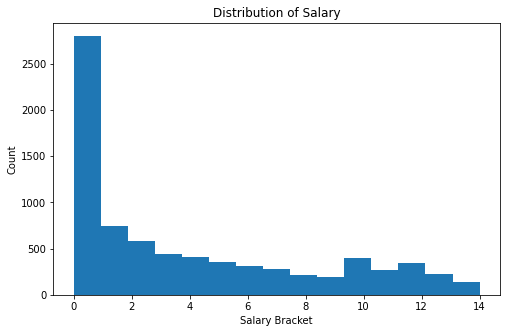

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['Salary'].values,bins=15)
plt.xlabel('Salary Bracket')
plt.ylabel('Count')
plt.title('Distribution of Salary')
plt.show()

In [ ]:
X = df.drop(['Salary'], axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape #We have more than 5000 training samples

(6160, 45)

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit(X_train).transform(X_train)
X_test_std = scaler.fit(X_train).transform(X_test)

In [ ]:
alphas = np.logspace(-5, 2, 50)
cv_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha,max_iter=10000)
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())
best_alpha = alphas[np.argmin(cv_scores)]

lasso = Lasso(alpha=best_alpha,max_iter=10000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
print('Feature coefficients:', lasso.coef_)

Mean squared error: 12.016616128267861
Feature coefficients: [ 0.34351615  0.19700879  0.14191427  0.49662773  0.36095133  0.43662726
 -0.22898894 -0.          0.42055547 -0.16543166 -0.08661645 -0.75576185
 -0.24451198  1.11215165  0.          0.42096801  0.         -0.10772745
 -0.          1.23699708  0.21549609  0.09463787  0.         -0.25031319
 -0.88932643 -1.23484326  0.42610617  0.         -0.05457408 -0.01063424
 -0.25779894  0.35775257 -0.22578049  0.          0.81975755 -0.34705913
  0.3860463   0.35552772 -0.          0.         -0.6050454   0.91365434
  0.33251209 -0.         -0.00124333]


In [ ]:
importances = pd.DataFrame({'Feature': X.columns, 'Lasso Coefficient': lasso.coef_})
importances = importances.sort_values('Lasso Coefficient', ascending=False)
importances

,Feature,Lasso Coefficient
19,"Q23_Manager (Program, Project, Operations, Exe...",1.236997
13,Q23_Data Architect,1.112152
41,"Q25_10,000 or more employees",0.913654
34,Q24_Medical/Pharmaceutical,0.819758
3,Q11,0.496628
5,Q30,0.436627
26,Q24_Accounting/Finance,0.426106
15,Q23_Data Scientist,0.420968
8,Q3_lgbt,0.420555
36,Q24_Online Service/Internet-based Services,0.386046


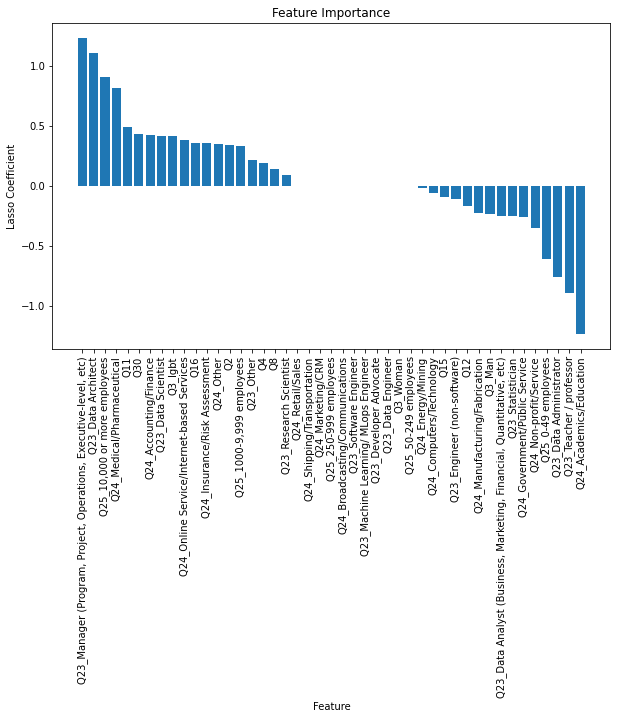

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x=importances['Feature'], height=importances['Lasso Coefficient'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Lasso Coefficient')
plt.title('Feature Importance')
plt.show()

As we can see, there are three different types of feature coefficients:
* Positive feature coefficient: this means that this feature leads to a higher/better value of the target column. The features that strongly impact the salary are being a manager, data architect, and working in large company with over 10,000 employees.
* Feature coefficient = zero: this means that this feature has no impact on the target column
* Negative feature coefficient: the corresponding features have a negative effect on the target variable. Those who impact the salary the worst are being in academia, being a teacher, and working as a data adminstrator.

In [ ]:
zero_features = importances[importances['Coefficient'] == 0] #drop all features with a lasso coefficient of zero
features_to_drop=zero_features['Feature'].tolist()
len(features_to_drop)

10

In [ ]:
for feature in features_to_drop:
  df = df.drop(feature, axis=1)

In [ ]:
df.shape

(7701, 36)

## **3. [4 pts] Model implementation:**

In [ ]:
X = df.drop(['Salary'], axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape #We have more than 5000 training samples

(6160, 35)

Since the data we have is spread over different scales, it is best to standarize the data to ensure that the coefficients are within the same range and are comparable.

In [ ]:
X_train_std = scaler.fit(X_train).transform(X_train)
X_test_std = scaler.fit(X_train).transform(X_test)

In [ ]:
X_train_std=pd.DataFrame(X_train_std)
X_test_std=pd.DataFrame(X_test_std)

In [ ]:
len(y_train.value_counts())

15

In [ ]:
def OrdinalLogisticRegression(X_train, y_train, X_test, model): #to write this function, I had to use inspiration from I codes I found on the internet, mainly stackoverflow and youtube.
    
    probabilities = pd.DataFrame()
    proba = pd.DataFrame()
    predict_list = []
    
    for i in range(14):
        y = []
        p_list = []
        for number in y_train:
            if number > i:
                y.append(1) # 1 is added to the list
            else:
                y.append(0) # 0 is added to the list
        
        model.fit(X_train, y) #fitting our data to the selected model, ours will be logistic regression
        
        prob = model.predict_proba(X_test)
        
        for j in range(prob.shape[0]):
            p_list.append(prob[j][0])
        
        probabilities[i] = p_list

    probabilities[14] = [1]*len(prob)

    
    # finding the probability
    for i in range(15):
        if i == 0 :
            proba[i] =  probabilities[i]
        else:
            proba[i] =  probabilities[i] - probabilities[i-1]

    
    # finding the prediction
    predict_list = proba.idxmax(axis=1)
    
    return probabilities, proba, predict_list

In [ ]:
model = LogisticRegression(random_state=1, max_iter = 10000)
index = 0
accuracy=[]
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

for train_idx, test_idx in kf.split(X_train):
    X_train_reg, X_val = X_train_std.values[train_idx], X_train_std.values[test_idx]
    y_train_reg, y_val = y_train.values[train_idx], y_train.values[test_idx]
  
    probabilites, proba, predict_list= OrdinalLogisticRegression(X_train_reg, y_train_reg, X_val,model)

    conf_matrix=confusion_matrix(y_val, predict_list)
    TP = conf_matrix[1][1]
    FN = conf_matrix[1][0]
    FP = conf_matrix[0][1]
    TN = conf_matrix[0][0]
    sum = TP + FN + FP + TN
    acc = (TP + TN) / sum
    accuracy.append(acc*100)
    index += 1
    
    print("Fold:", index, "Accuracy:",round(acc*100,2),'%') 

print("Average Accuracy:", round(np.mean(accuracy),2),'%')
print('Accuracy standard deviation:', (np.std(accuracy)))

Fold: 1 Accuracy: 79.62 %
Fold: 2 Accuracy: 78.35 %
Fold: 3 Accuracy: 79.77 %
Fold: 4 Accuracy: 80.22 %
Fold: 5 Accuracy: 81.11 %
Fold: 6 Accuracy: 77.65 %
Fold: 7 Accuracy: 81.92 %
Fold: 8 Accuracy: 78.79 %
Fold: 9 Accuracy: 75.19 %
Fold: 10 Accuracy: 77.74 %
Average Accuracy: 79.03 %
Accuracy standard deviation: 1.8390186365403083


In [ ]:
proba #the probability of test sample to match a salary bucket 
classification = pd.Series(predict_list, name='Salary Bucket Prediction')
new_proba = pd.concat([proba, classification], axis=1)
new_proba

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Salary Bucket Prediction
0,0.337621,0.168771,0.071693,0.079287,0.122551,0.058601,0.038983,0.024921,0.027919,0.001850,0.030508,0.014791,0.016903,0.004348,0.001252,0
1,0.011889,0.006295,0.008658,0.014178,0.013660,0.004749,0.014369,0.010792,0.014988,0.013250,0.063407,0.057486,0.221948,0.161522,0.382812,14
2,0.418746,0.141044,0.115240,0.045992,0.067737,0.027421,0.031656,0.032276,0.016970,0.020709,0.034516,0.024197,0.014629,0.008416,0.000451,0
3,0.083704,0.016370,0.066422,0.053090,0.004095,0.074952,0.089990,0.103540,0.068839,0.088200,0.159499,0.081485,0.071807,0.034798,0.003209,10
4,0.298112,0.125482,0.154945,0.101157,0.083975,0.053942,0.032200,0.035377,0.030648,0.024630,0.027582,0.011858,0.012353,0.005497,0.002241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.457022,0.133000,0.110252,0.048129,0.060611,0.031547,0.022919,0.025786,0.017023,0.013383,0.032320,0.022592,0.011606,0.006150,0.007661,0
612,0.128489,0.057255,0.050312,0.061545,0.078823,0.139826,0.000524,0.038635,0.039543,0.043201,0.091494,0.051956,0.123153,0.046736,0.048509,5
613,0.086081,0.105599,0.043089,0.100823,0.079477,0.039395,0.047030,0.005659,0.060990,-0.004768,0.055671,0.068424,0.160283,0.115478,0.036768,12
614,0.554637,0.188614,0.089858,0.063120,0.013579,0.021497,0.021984,0.014770,0.010485,0.006236,0.009867,0.001568,0.001736,0.001101,0.000949,0


In [ ]:
#Treating each value of hyperparameter(s) as a new model, which model performed best? 
#We will look at changes in C value and account a model for each value
bias_list = [] #to store bias 
variance_list = [] #to store variance
c_values = np.logspace(-3, 3, num=9)
for c in c_values:
        model = LogisticRegression(C=c, random_state=1, max_iter = 10000)
        index = 0
        c_bias = []
        c_var =[]

        for train_idx, test_idx in kf.split(X_train):
            X_train_reg, X_val = X_train_std.values[train_idx], X_train_std.values[test_idx]
            y_train_reg, y_val = y_train.values[train_idx], y_train.values[test_idx]
  
            probabilites, proba, predict_list= OrdinalLogisticRegression(X_train_reg, y_train_reg, X_val,model)

            bias = pow((np.mean(predict_list)-y_val),2)
            variance = np.mean(pow(np.mean(predict_list)-predict_list,2))
        
            c_var.append(np.mean(variance))
            c_bias.append(np.mean(bias))
              
        variance_list.append(np.mean(c_var))
        bias_list.append(np.mean(c_bias))
  
print(bias_list)
print(variance_list)

C = 0.001
C = 0.005623413251903491
C = 0.03162277660168379
C = 0.1778279410038923
C = 1.0
C = 5.623413251903491
C = 31.622776601683793
C = 177.82794100389228
C = 1000.0
[30.058203322651373, 24.42552364437511, 22.82724057598246, 22.424012270197334, 22.347041290689834, 22.324432345252156, 22.32234040310339, 22.32385757505482, 22.32234040310339]
[6.827711249789173, 16.02207871268342, 19.012257547647156, 19.891364479676167, 20.082429319868446, 20.125816431944678, 20.13846559284871, 20.12957365280823, 20.13846559284871]


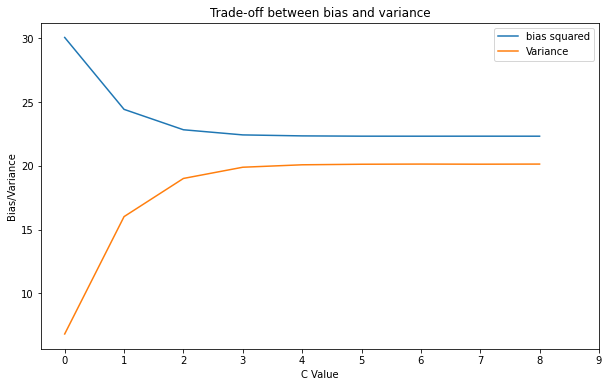

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(bias_list, label='bias')
plt.plot(variance_list,  label='Variance')
plt.xlabel('C Value')
plt.ylabel('Bias/Variance')
plt.xticks(range(0, 10, 1)) 
plt.title('Trade-off between bias and variance')
plt.legend()
plt.show()

## **4. [3 pts] Model tuning:**


There are different parameters in logistic regression, mainly: regularization parameter C, penalty, maximum number of iterations, solver used and more. For the purpose of this project, I will focus on the regularization parameter C and solver. C because I already worked on it in the previous part, and the solver because I find it interesting to see the effect of solver choice on the results. I will use the F1 score as metric.

In [ ]:
#finding the best c and solver using a gridsearch
opt_c = {}
opt_solver={}
opt_model = model
opt_f1 = 0

solvers=['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for c in [0.001,0.01,0.1,1]: #changed from c_values used before because it was taking too long to run and we saw that variance and bias stay constant after c=4 and the best one was 0.001
    for solver in solvers:
        model = LogisticRegression(C=c, solver=solver, random_state=1, max_iter = 10000)
        f1= []
        index = 0
        for train_idx, test_idx in kf.split(X_train):
            X_train_reg, X_val = X_train.values[train_idx], X_train.values[test_idx]
            y_train_reg, y_val = y_train.values[train_idx], y_train.values[test_idx]
    
            probabilites, proba, predict_list= OrdinalLogisticRegression(X_train_reg, y_train_reg, X_val,model)
            
            f1_C = f1_score(y_val,predict_list, average='micro')

            f1.append(f1_C)
            index += 1
        
            if np.mean(f1) > opt_f1:
                opt_model = model
                opt_c=c
                opt_solver=solver
                opt_f1 = np.mean(f1)

print("Best Score:",round(opt_f1*100,3),'%')      
print("The optimal c is:", opt_c, 'and the optimal solver is:',opt_solver)

Best Score: 38.182 %
The optimal c is: 0.01 and the optimal solver is: lbfgs


In [ ]:
importance_based_on_f1 = pd.DataFrame(opt_model.coef_)
importance_based_on_f1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.064848,0.011332,-0.075862,0.211336,0.14888,0.328337,-0.024369,0.010432,-0.004989,-0.06325,-0.006322,-0.05151,0.011882,-0.067005,-0.013987,0.088305,0.039118,0.035524,-0.003184,-0.060787,-0.107212,0.117457,0.126535,-0.030522,-0.02535,0.000504,-0.036256,-0.051087,-0.008511,0.025963,0.044351,-0.04594,0.123036,0.046214,-0.066677


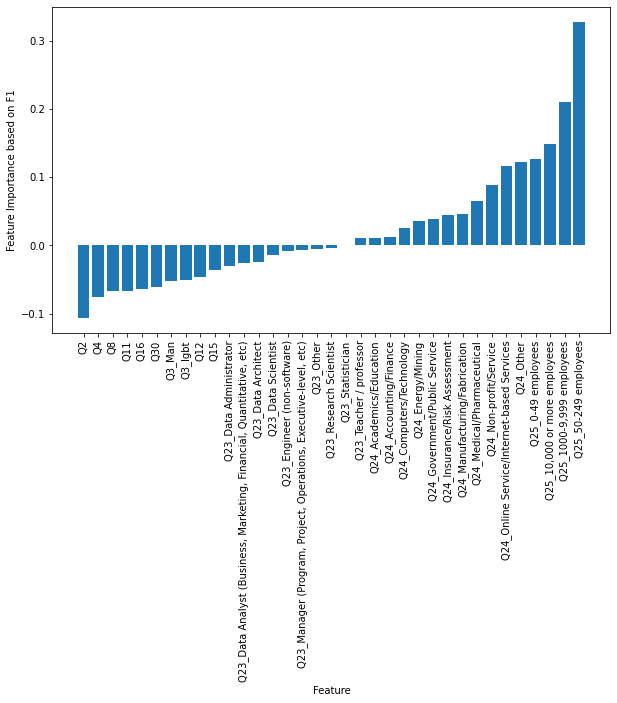

In [ ]:
importances_f1=importance_based_on_f1.values.flatten()
plt.figure(figsize=(10, 6))
importances_f1 = np.sort(importances_f1)
plt.bar(X.columns, importances_f1)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance based on F1')
plt.xlabel('Feature')
plt.show()

## **5. [4 pts] Testing & Discussion:**


In [ ]:
#MSE for training set
opt_model = LogisticRegression(C=0.01,solver='lbfgs',random_state=1, max_iter = 10000)
kf = KFold(n_splits=10)
kf.get_n_splits(X)
mse_train = []

for train_idx, test_idx in kf.split(X_train):
    X_train_reg, X_val = X_train_std.values[train_idx], X_train_std.values[test_idx]
    y_train_reg, y_val = y_train.values[train_idx], y_train.values[test_idx]

    probabilites, proba, predict_list= OrdinalLogisticRegression(X_train_reg, y_train_reg, X_val,opt_model)

    mse = mean_squared_error(y_val, predict_list)
    mse_train.append(mse)

In [ ]:
#MSE for test set
opt_model = LogisticRegression(C=0.01,solver='lbfgs',random_state=1, max_iter = 10000)
kf = KFold(n_splits=10)
kf.get_n_splits(X)
mse_test = []

for train_idx, test_idx in kf.split(X_train):
    X_train_reg, X_val = X_train_std.values[train_idx], X_train_std.values[test_idx]
    y_train_reg, y_val = y_train.values[train_idx], y_train.values[test_idx]

    probabilites, proba, predict_list= OrdinalLogisticRegression(X_train_reg, y_train_reg, X_test,opt_model)

    mse = mean_squared_error(y_test, predict_list)
    mse_test.append(mse)

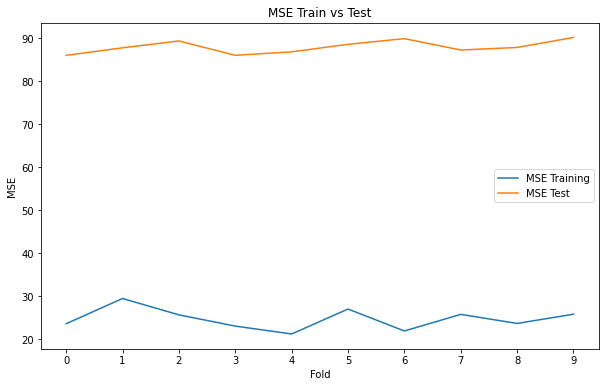

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(mse_train, label='MSE Training')
plt.plot(mse_test,  label='MSE Test')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.xticks(range(0, 10, 1)) 
plt.title('MSE Train vs Test')
plt.legend()
plt.show()

MSE is higher for test set than training set, so the model is overfitting.

In [ ]:
#F1 Train
opt_model = LogisticRegression(C=0.01,solver='lbfgs',random_state=1, max_iter = 10000)
probabilites, proba, predict_list= OrdinalLogisticRegression(X_train_reg, y_train_reg, X_val,opt_model)
f1_train = f1_score(y_val,predict_list, average='micro')
print(f1_train)

0.3717532467532467


In [674]:
#F1 Test
opt_model = LogisticRegression(C=0.01,solver='lbfgs',random_state=1, max_iter = 10000)
probabilites, proba, predict_list= OrdinalLogisticRegression(X_train_reg, y_train_reg, X_test,opt_model)
f1_train = f1_score(y_test,predict_list, average='micro')
print(f1_train)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn

0.025957170668397145


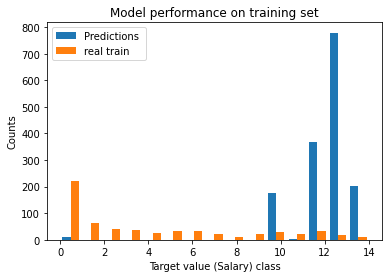

In [676]:
# Plot for Train
plt.hist([predict_list,y_val],bins=15,
         label=['Predictions ','real train'])
plt.xlabel('Salary Bucket')
plt.ylabel('Count')
plt.title('Model performance on training set')
plt.legend()
plt.show()

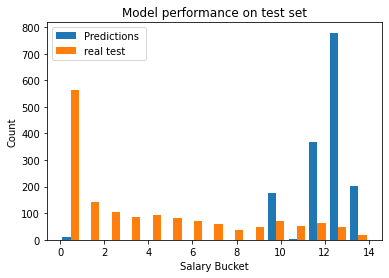

In [677]:
# Plot for Test
plt.hist([predict_list,y_test],bins=15,
         label=['Predictions ','real test'])
plt.xlabel('Salary Bucket')
plt.ylabel('Count')
plt.title('Model performance on test set')
plt.legend()
plt.show()

Although both plots and predictions seem way off, there seems to be a similarity between the plots of the test and train set. As we've established, this model seems to performing poorly in an overfit manner. When the model begins to fit the noise in the training data rather than the underlying pattern, overfitting takes place. There are numerous ways to approach this problem, mainly:
* Use regularisation techniques like L1 or L2 regularisation to stop the model from becoming too closely matched to the training set.
* Increase the volume of training data since more data will help the model generalise more effectively and prevent overfitting.
* Employ a simpler model rather than one that can overfit the training set of data. Employing a less complex model could aid in lowering overfitting.